# Ethereum 

Ethereum is a decentralized, open-source blockchain with smart contract functionality. Ether (ETH or Ξ) is the native cryptocurrency of the platform. Amongst cryptocurrencies, Ether is second only to Bitcoin in market capitalization.


Ethereum was conceived in 2013 by programmer Vitalik Buterin. In 2014, development work commenced and was crowdfunded, and the network went live on 30 July 2015. The platform allows anyone to deploy permanent and immutable decentralized applications onto it, with which users can interact. Decentralized finance (DeFi) applications provide a broad array of financial services without the need for typical financial intermediaries like brokerages, exchanges, or banks, such as allowing cryptocurrency users to borrow against their holdings or lend them out for interest. Ethereum also allows for the creation and exchange of NFTs, which are non-interchangeable tokens connected to digital works of art or other real-world items and sold as unique digital property. Additionally, many other cryptocurrencies operate as ERC-20 tokens on top of the Ethereum blockchain and have utilized the platform for initial coin offerings.

Ethereum has started implementing a series of upgrades called Ethereum 2.0, which includes a transition to proof of stake and aims to increase transaction throughput using sharding.

In [1]:
# Description: This program attempts to predict the future price of ETH

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('ETH-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-28,321.829742,325.905975,307.721344,316.657257,316.657257,1.235711e+10
1,2020-07-29,316.555359,324.380798,313.109589,318.190887,318.190887,1.087885e+10
2,2020-07-30,318.144989,338.631195,315.751099,334.586639,334.586639,1.182769e+10
3,2020-07-31,334.633728,348.611359,329.340942,345.554657,345.554657,1.203060e+10
4,2020-08-01,345.798615,388.847961,343.587433,385.199707,385.199707,1.404526e+10
...,...,...,...,...,...,...,...
423,2021-09-24,3154.562012,3159.644043,2747.337646,2931.669189,2931.669189,2.559542e+10
424,2021-09-25,2930.884766,2968.994629,2818.970459,2925.565674,2925.565674,1.893279e+10
425,2021-09-26,2926.343018,3114.857422,2744.583008,3062.265381,3062.265381,2.117277e+10
426,2021-09-27,3065.837891,3163.665039,2932.692871,2934.138916,2934.138916,1.916405e+10


In [4]:
# Set the data as the index
df = df.set_index(pd.DatetimeIndex(df['Date']))
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-07-28,2020-07-28,321.829742,325.905975,307.721344,316.657257,316.657257,1.235711e+10
2020-07-29,2020-07-29,316.555359,324.380798,313.109589,318.190887,318.190887,1.087885e+10
2020-07-30,2020-07-30,318.144989,338.631195,315.751099,334.586639,334.586639,1.182769e+10
2020-07-31,2020-07-31,334.633728,348.611359,329.340942,345.554657,345.554657,1.203060e+10
2020-08-01,2020-08-01,345.798615,388.847961,343.587433,385.199707,385.199707,1.404526e+10
...,...,...,...,...,...,...,...
2021-09-24,2021-09-24,3154.562012,3159.644043,2747.337646,2931.669189,2931.669189,2.559542e+10
2021-09-25,2021-09-25,2930.884766,2968.994629,2818.970459,2925.565674,2925.565674,1.893279e+10
2021-09-26,2021-09-26,2926.343018,3114.857422,2744.583008,3062.265381,3062.265381,2.117277e+10


In [5]:
df.dropna(inplace = True)

In [6]:
future_days = 5 


In [7]:
#Create a new colum 
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
# Show the data 
df[['Close', str(future_days) + '_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
Date,,
2020-07-28,316.657257,370.671722
2020-07-29,318.190887,386.295166
2020-07-30,334.586639,389.875488
2020-07-31,345.554657,401.590576
2020-08-01,385.199707,394.961945
...,...,...
2021-09-24,2931.669189,NaN
2021-09-25,2925.565674,NaN
2021-09-26,3062.265381,NaN


In [8]:
X = np.array(df[['Close']])
X = X[:df.shape[0]-future_days] #Cancelling the last 5 observations

In [9]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]

In [10]:
#Split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) 

In machine learning, the radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.


The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as

${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}{\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {\|\mathbf {x} -\mathbf {x'} \|^{2}}{2\sigma ^{2}}}\right)}
{\displaystyle \textstyle \|\mathbf {x} -\mathbf {x'} \|^{2}}{\displaystyle \textstyle \|\mathbf {x} -\mathbf {x'} \|^{2}}$ may be recognized as the squared Euclidean distance between the two feature vectors. ${\displaystyle \sigma }\sigma  is a free parameter. An equivalent definition involves a parameter {\displaystyle \textstyle \gamma ={\tfrac {1}{2\sigma ^{2}}}}\textstyle \gamma ={\tfrac {1}{2\sigma ^{2}}}$:

${\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp(-\gamma \|\mathbf {x} -\mathbf {x'} \|^{2})}{\displaystyle K(\mathbf {x} ,\mathbf {x'} )=\exp(-\gamma \|\mathbf {x} -\mathbf {x'} \|^{2})}$
Since the value of the RBF kernel decreases with distance and ranges between zero (in the limit) and one (when x = x'), it has a ready interpretation as a similarity measure. The feature space of the kernel has an infinite number of dimensions; for ${\displaystyle \sigma =1}\sigma =1$, its expansion is:

${\displaystyle {\begin{alignedat}{2}\exp \left(-{\frac {1}{2}}\|\mathbf {x} -\mathbf {x'} \|^{2}\right)&=\exp({\frac {2}{2}}\mathbf {x} ^{\top }\mathbf {x'} -{\frac {1}{2}}\|\mathbf {x} \|^{2}-{\frac {1}{2}}\|\mathbf {x'} \|^{2})\\&=\exp(\mathbf {x} ^{\top }\mathbf {x'} )\exp(-{\frac {1}{2}}\|\mathbf {x} \|^{2})\exp(-{\frac {1}{2}}\|\mathbf {x'} \|^{2})\\&=\sum _{j=0}^{\infty }{\frac {(\mathbf {x} ^{\top }\mathbf {x'} )^{j}}{j!}}\exp \left(-{\frac {1}{2}}\|\mathbf {x} \|^{2}\right)\exp \left(-{\frac {1}{2}}\|\mathbf {x'} \|^{2}\right)\\&=\sum _{j=0}^{\infty }\sum _{\sum n_{i}=j}\exp \left(-{\frac {1}{2}}\|\mathbf {x} \|^{2}\right){\frac {x_{1}^{n_{1}}\cdots x_{k}^{n_{k}}}{\sqrt {n_{1}!\cdots n_{k}!}}}\exp \left(-{\frac {1}{2}}\|\mathbf {x'} \|^{2}\right){\frac {{x'}_{1}^{n_{1}}\cdots {x'}_{k}^{n_{k}}}{\sqrt {n_{1}!\cdots n_{k}!}}}\end{alignedat}}}$

${\displaystyle {\begin{alignedat}{2}\exp \left(-{\frac {1}{2}}\|\mathbf {x} -\mathbf {x'} \|^{2}\right)&=\exp({\frac {2}{2}}\mathbf {x} ^{\top }\mathbf {x'} -{\frac {1}{2}}\|\mathbf {x} \|^{2}-{\frac {1}{2}}\|\mathbf {x'} \|^{2})\\&=\exp(\mathbf {x} ^{\top }\mathbf {x'} )\exp(-{\frac {1}{2}}\|\mathbf {x} \|^{2})\exp(-{\frac {1}{2}}\|\mathbf {x'} \|^{2})\\&=\sum _{j=0}^{\infty }{\frac {(\mathbf {x} ^{\top }\mathbf {x'} )^{j}}{j!}}\exp \left(-{\frac {1}{2}}\|\mathbf {x} \|^{2}\right)\exp \left(-{\frac {1}{2}}\|\mathbf {x'} \|^{2}\right)\\&=\sum _{j=0}^{\infty }\sum _{\sum n_{i}=j}\exp \left(-{\frac {1}{2}}\|\mathbf {x} \|^{2}\right){\frac {x_{1}^{n_{1}}\cdots x_{k}^{n_{k}}}{\sqrt {n_{1}!\cdots n_{k}!}}}\exp \left(-{\frac {1}{2}}\|\mathbf {x'} \|^{2}\right){\frac {{x'}_{1}^{n_{1}}\cdots {x'}_{k}^{n_{k}}}{\sqrt {n_{1}!\cdots n_{k}!}}}\end{alignedat}}}$

In [11]:
y_train = y_train[~np.isnan(y_train)]

In [12]:
x_train = x_train[~np.isnan(x_train)]

In [13]:
#y_train = np.ravel(y_train)

In [14]:
x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)

In [15]:
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [16]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy: ' + str(svr_rbf_confidence))

svr_rbf accuracy: 0.9251252383817048


In [17]:
# Compare predicted values with actual values 
svm_prediction = svr_rbf.predict((x_test))
print(svm_prediction)

[3241.91001382 3594.01753231  560.84747779 3332.56785519 1601.79890623
  403.37170271 2933.7300647   374.88251569 1839.68203479  425.23879078
 2528.96657171  372.5558648  1806.31318285  854.57368511 2410.12915969
  642.9274797   403.59278338 3218.53063357  627.88588099 1967.35387977
  372.53357242 2674.00263464 1844.65609336 1834.75581522 2246.62180469
 2746.87668082  370.37631727 2421.78343516  409.11488637 2477.70903044
 2457.49700053  368.73531016 1479.53941228  460.25638252 2422.43136818
 2465.50130296  370.95159622  515.51400279  368.15283033  381.76355708
 2639.12207686  659.62855382  677.73194534 3328.71828543  430.50108608
  459.29762039 3642.72547388 3210.45272521 2202.71700139  399.77715679
  384.76556824 1954.83975891  604.65796727 1807.70509164 1432.27153402
 2454.93677905 2545.11846566 3570.06958828 1856.70227832 1828.37175699
 3629.17763027 1800.10284582 2354.96996497  379.64164342 1787.71369042
 3653.48073323 2212.51945774  393.00381943 3203.66938317 2248.54003094
  371.

In [18]:
print(y_test)

[3928.844727 3715.148438  518.801147 3398.538818 1575.853149  382.819977
 3141.691162  384.364532 1788.217041  423.669312 2537.891113  354.2771
 1746.616821 1207.112183 2237.136963  596.595459  408.144196 3615.282715
  575.758057 1475.703735  353.121918 3167.856201 1937.449219 1791.702271
 2135.942139 3253.629395  374.695587 2036.721069  386.730103 2662.865234
 1888.44751   401.590576 1324.414795  480.360077 2773.207031 2502.349609
  354.9505    570.686646  365.570007  409.766693 2390.30542   751.618958
  626.410706 2109.579834  389.126343  471.630432 3497.315186 3265.443359
 2435.10498   444.163055  402.141998 1787.510742  659.297913 1691.355957
 1314.986206 2746.380127 2715.092773 3427.340088 2113.605469 2191.373779
 3270.278076 1564.707642 2120.026367  365.812286 1846.033691 3211.505859
 2226.114258  428.741791 2430.621338 2419.90625   346.532654  589.355591
 2460.679199  382.632629 1848.458252  413.77298  1744.243408 1854.564331
 1593.413452 2706.628906 2246.364502 1043.43457  3310

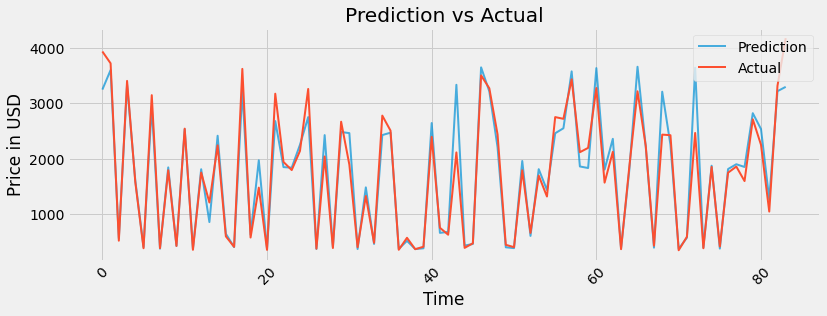

In [21]:
plt.figure(figsize = (12,4))
plt.plot(svm_prediction, label = 'Prediction', lw = 2 , alpha = 0.7)
plt.plot(y_test, label = 'Actual', lw = 2)
plt.title('Prediction vs Actual')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.xticks(rotation = 45)
plt.show()

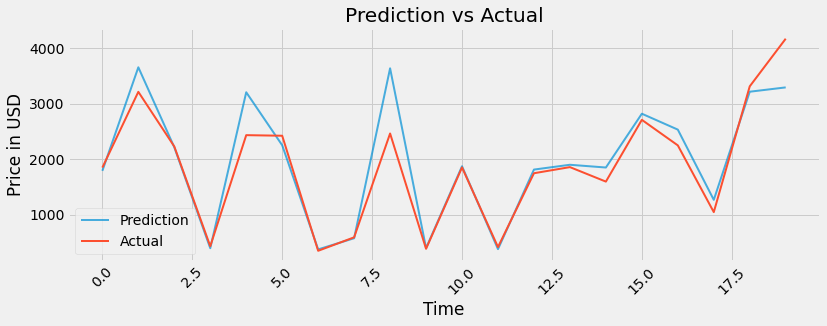

In [22]:
plt.figure(figsize = (12,4))
plt.plot(svm_prediction[-20:], label = 'Prediction', lw = 2 , alpha = 0.7)
plt.plot(y_test[-20:], label = 'Actual', lw = 2)
plt.title('Prediction vs Actual')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.xticks(rotation = 45)
plt.show()